In [1]:
import warnings
warnings.filterwarnings("ignore")   # keep output tidy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


In [3]:
# Load / prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # features
y = pd.Series(data.target)                              # labels

print("Dataset shape (X):", X.shape)
print("Labels distribution:\n", y.value_counts().sort_index())



Dataset shape (X): (569, 30)
Labels distribution:
 0    212
1    357
Name: count, dtype: int64


In [5]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [7]:
# Train model
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)
print("\nModel trained:", model.__class__.__name__)


Model trained: LogisticRegression


In [9]:
# Predictions
y_pred = model.predict(X_test)


In [11]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n=== Evaluation Metrics ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")


=== Evaluation Metrics ===
Accuracy  : 0.9649
Precision : 0.9652
Recall    : 0.9649
F1 Score  : 0.9647


In [13]:
# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=data.target_names, digits=4))



=== Classification Report ===
              precision    recall  f1-score   support

   malignant     0.9750    0.9286    0.9512        42
      benign     0.9595    0.9861    0.9726        72

    accuracy                         0.9649       114
   macro avg     0.9672    0.9573    0.9619       114
weighted avg     0.9652    0.9649    0.9647       114



In [15]:
# Confusion matrix plotting 
cm = confusion_matrix(y_test, y_pred)
labels = data.target_names

def plot_confusion_matrix(cm, labels, title="Confusion Matrix", normalize=False):
    if normalize:
        cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_display = cm

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm_display, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    plt.colorbar(im)

    tick_marks = np.arange(len(labels))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm_display.max() / 2.
    for i in range(cm_display.shape[0]):
        for j in range(cm_display.shape[1]):
            ax.text(j, i, format(cm_display[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm_display[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

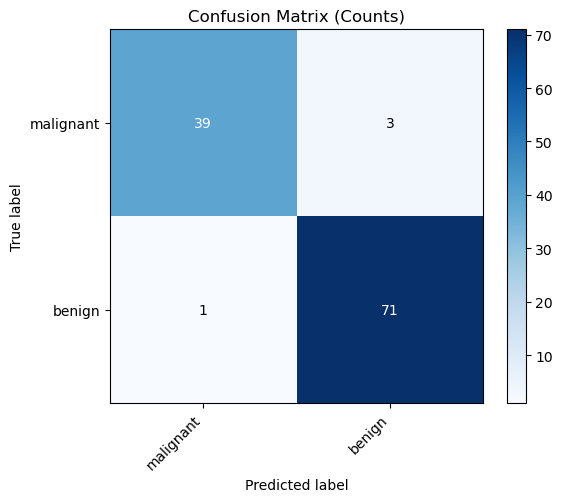

In [17]:
# Show raw counts confusion matrix
plot_confusion_matrix(cm, labels, title="Confusion Matrix (Counts)", normalize=False)

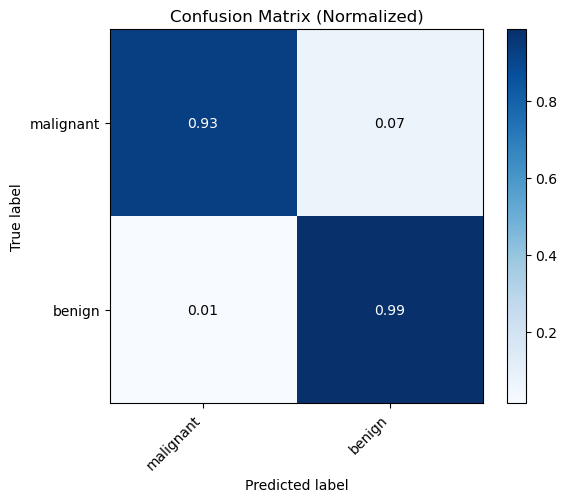

In [19]:
# Show normalized confusion matrix
plot_confusion_matrix(cm, labels, title="Confusion Matrix (Normalized)", normalize=True)
